# **Import Library**

In [1]:
import pandas as pd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error


# **Load Dataset**

membaca 5 kolom pertama dalam data


In [2]:
# Load dataset
df = pd.read_csv("Admission_Predict.csv")

# Tampilkan 5 data pertama
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# **Preparation Data**

1. drop kolom series

menghapus kolom serial no, karena kolom tersebut tidak relevan dengan fitur yang akan digunakan dan tidak memiliki pengaruh terhadap analisis.

In [3]:
df.drop(columns=['Serial No.'], inplace=True, errors='ignore')

2.   melihat informasi data (jumlah data, type data dan lain-lain)



megecek info dataset yang akan digunakan baik jumlah data maupun type data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


3. melihat deskirisi statistik data

menampilkan statistik deskriptif dari sebuah dataset berupa distribusi data numerik, termasuk ukuran pemusatan, dispersi, dan bentuk distribusi

In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


4. missing value

mengecek apakah ada data yang kosong(Null) atau missing value  dalam dataset, serta bagaimana penanganannya dapat memengaruhi hasil analisis.

In [6]:
print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


5. cek dupikat

mengecek dupliakasi data, apabila terindeksi adanya duplikat data maka data yang duplikat harus ditangani.

In [7]:
duplicates = df.duplicated().sum()
print(f"Jumlah duplikat: {duplicates}")


Jumlah duplikat: 0


6. mengecek outlier

mengecek dan menghapus outlier yang ada, penanganan outlier pada program ini dengan menggunakan teknik IQR.

In [8]:
# Deteksi outlier menggunakan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Buat filter data tanpa outlier
filtered_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Jumlah data sebelum membersihkan outlier: {len(df)}")
print(f"Jumlah data setelah membersihkan outlier: {len(filtered_df)}")

# Gunakan dataframe yang sudah difilter untuk proses selanjutnya
df = filtered_df.reset_index(drop=True)


Jumlah data sebelum membersihkan outlier: 500
Jumlah data setelah membersihkan outlier: 497


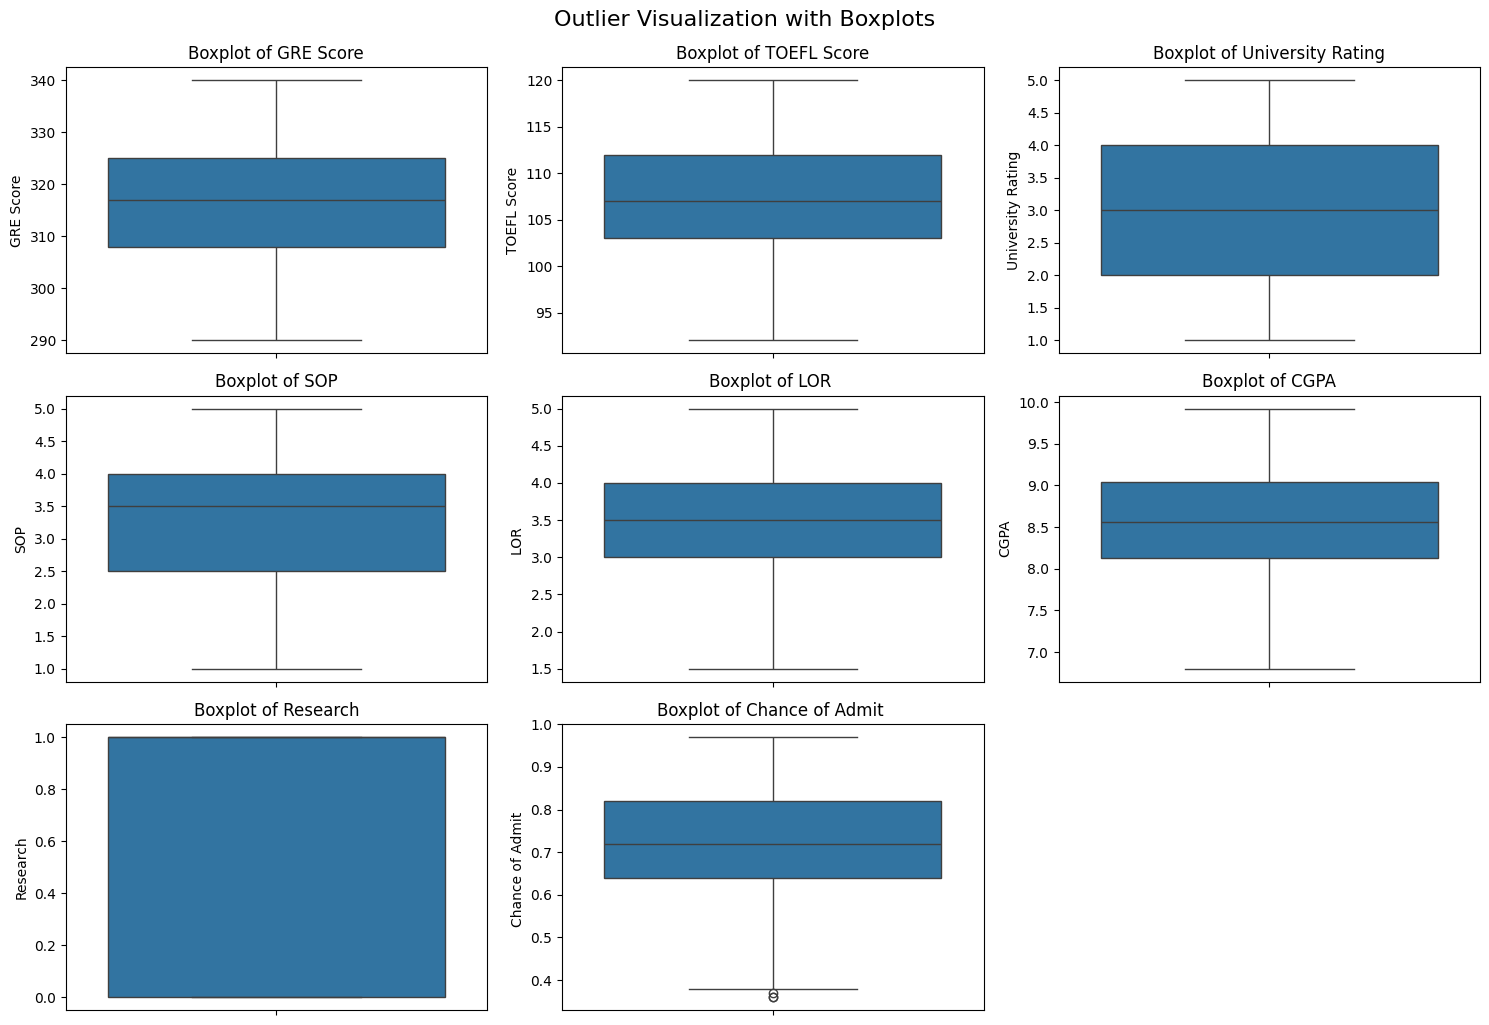

In [9]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.suptitle("Outlier Visualization with Boxplots", y=1.02, fontsize=16)
plt.show()

7. normalisasi data

menggunakan standatrscaler hal ini dilakuakan agar semua fitur memiliki skala yang seragam untuk menghindari dominasi fitur dengan nilai besar

In [10]:
# Normalisasi data numerik
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

8. Split dataset

pembagian dataset kedalam bentuk 80:20 dengan 80% sebagai data train dan 20% sebagai data test

In [11]:
# Bagi data menjadi train dan test
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42
)


# **Modeling**

**Linear Regression**

In [12]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)


LinearRegression()

**Evaluasi Model Linear Regresion dengan Menggunakan**


* R² Score
* MSE
* RMSE
* MAE







In [13]:
# Prediksi
y_pred = model_lr.predict(X_test)

# Evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae_rf:.4f}")



R² Score: 0.7959
MSE: 0.0037
RMSE: 0.0606
MAE: 0.0436


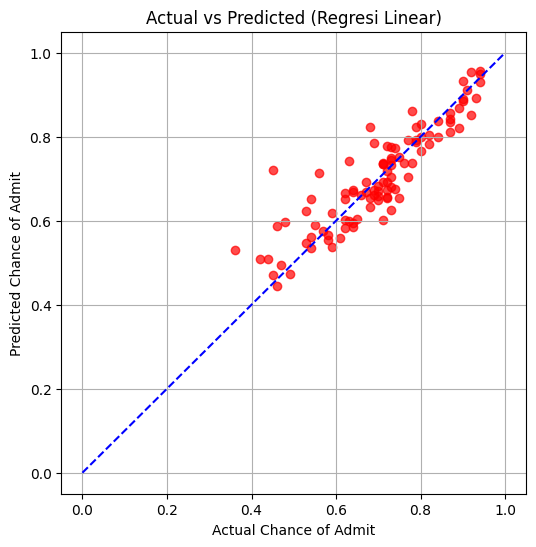

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='red')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted (Regresi Linear)")
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.grid(True)
plt.show()


**Random Forest**

In [15]:
from sklearn.ensemble import RandomForestRegressor


inisialisasi model random forest

In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

melatih model random forest

In [17]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluasi Random Forest**

prediksi dan evaluasi model random Forest dengan menggunakan:
* R² Score
* MSE
* RMSE
* MAE


In [18]:
y_pred_rf = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Evaluation:")
print("R² Score:", round(r2_rf, 4))
print("MAE  :", round(mae_rf, 4))
print("MSE  :", round(mse_rf, 4))
print("RMSE :", round(rmse_rf, 4))

Random Forest Regressor Evaluation:
R² Score: 0.7727
MAE  : 0.0463
MSE  : 0.0041
RMSE : 0.064


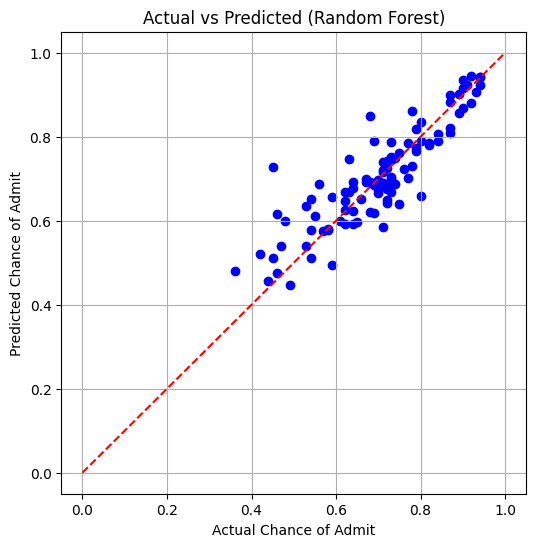

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([0,1],[0,1],'r--')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted (Random Forest)")
plt.grid(True)
plt.show()

**Simpan Model**

menyimpan model kedalam bentuk joblib

In [20]:
import joblib

# Simpan model linear regression
joblib.dump(model_lr, 'linear_regression_model.pkl')

# Simpan model random forest
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

**Infernce**

infrence dilakukan untuk memprediksi bagaimana model yang telah disimpan dapat memprediksi data mahasiswa baru

In [21]:
lr_model = joblib.load('linear_regression_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')

# data baru untuk prediksi
data_baru = pd.DataFrame([{
    'GRE Score': 330,
    'TOEFL Score': 115,
    'University Rating': 4,
    'SOP': 4.5,
    'LOR ': 4.5,
    'CGPA': 9.2,
    'Research': 1
}])

# Prediksi menggunakan Linear Regression
pred_lr = lr_model.predict(data_baru)

# # Prediksi menggunakan Random Forest
pred_rf = rf_model.predict(data_baru)

print("Prediksi Chance of Admit - Linear Regression:", round(pred_lr[0], 4))
print("Prediksi Chance of Admit - Random Forest:", round(pred_rf[0], 4))

Prediksi Chance of Admit - Linear Regression: 0.8797
Prediksi Chance of Admit - Random Forest: 0.8852
